# 인구통계 데이터


In [84]:
def get_list(list_data) :
    import csv
    f = open('population_2020.csv', 'r', encoding = 'utf-8')
    lines = csv.reader(f)

    header = next(lines)

    list_tmp = []
    for line in lines :
        list_tmp.append(line[:])

    # 행과 열 바꿔주기
    for j in range(7) : # 리스트의 행과 열을 변경하는 코드
        temp = []
        for i in range(len(list_tmp)) :
            temp.append(list_tmp[i][j])
            
        list_data.append(temp)

def get_dict(list_data, keys, dict_data) :
        area = get_area(list_data[0])
        dict_data.update({keys[0]:area})

        for i in range(1, 7) :
            if i == 3 or i == 6 :
                data = del_comma(list_data[i], 'float')
            else :
                data = del_comma(list_data[i], 'integer')

            dict_data.update({keys[i]:data})
                

def get_area(data) :
    tmp = []
    for x in data :
        arr = x.split()
        tmp.append(arr[0])

    return tmp

# 숫자 표기법 변환(깔끔하게)(, 없애기)
def del_comma(data, t) :
    tmp = []
    for x in data :
        string = ''
        arr = x.split(',') # arr에 ['1', '293', '000']으로 첨부되어있다.
        for i in range(len(arr)) :
            string += arr[i]

        if t == 'integer' :
            tmp.append(int(string))
        else :
            tmp.append(float(string))

    return tmp    

In [85]:
list_data = []

get_list(list_data)
print(list_data)

[['서울특별시  (1100000000)', '부산광역시  (2600000000)', '대구광역시  (2700000000)', '인천광역시  (2800000000)', '광주광역시  (2900000000)', '대전광역시  (3000000000)', '울산광역시  (3100000000)', '세종특별자치시  (3600000000)', '경기도  (4100000000)', '강원도  (4200000000)', '충청북도  (4300000000)', '충청남도  (4400000000)', '전라북도  (4500000000)', '전라남도  (4600000000)', '경상북도  (4700000000)', '경상남도  (4800000000)', '제주특별자치도  (5000000000)'], ['9,736,962', '3,410,925', '2,432,883', '2,954,955', '1,456,121', '1,473,125', '1,145,710', '343,788', '13,265,377', '1,539,521', '1,598,599', '2,120,995', '1,815,112', '1,861,894', '2,658,956', '3,358,828', '670,876'], ['4,345,877', '1,502,333', '1,033,349', '1,242,107', '618,503', '637,726', '469,551', '136,629', '5,497,087', '721,003', '723,931', '961,890', '818,452', '873,871', '1,229,265', '1,455,655', '293,932'], ['      2.24', '      2.27', '      2.35', '      2.38', '      2.35', '      2.31', '      2.44', '      2.52', '      2.41', '      2.14', '      2.21', '      2.21', '      2.22', '     

In [86]:
# 리스트에서 딕셔너리로 변경
dict_data = {}
keys = ['지역', '총인구수', '세대수', '세대당_인구', '남자_인구수', '여자_인구수', '남여_비율']

for i in range(len(keys)) :
    dict_data[keys[i]] = list_data[i]

dict_data = {}
get_dict(list_data, keys, dict_data)
print(dict_data)

{'지역': ['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도'], '총인구수': [9736962, 3410925, 2432883, 2954955, 1456121, 1473125, 1145710, 343788, 13265377, 1539521, 1598599, 2120995, 1815112, 1861894, 2658956, 3358828, 670876], '세대수': [4345877, 1502333, 1033349, 1242107, 618503, 637726, 469551, 136629, 5497087, 721003, 723931, 961890, 818452, 873871, 1229265, 1455655, 293932], '세대당_인구': [2.24, 2.27, 2.35, 2.38, 2.35, 2.31, 2.44, 2.52, 2.41, 2.14, 2.21, 2.21, 2.22, 2.13, 2.16, 2.31, 2.28], '남자_인구수': [4745133, 1673266, 1202364, 1481133, 720686, 735791, 588626, 171403, 6672706, 774358, 809805, 1081153, 902365, 934900, 1338907, 1690600, 337295], '여자_인구수': [4991829, 1737659, 1230519, 1473822, 735435, 737334, 557084, 172385, 6592671, 765163, 788794, 1039842, 912747, 926994, 1320049, 1668228, 333581], '남여_비율': [0.95, 0.96, 0.98, 1.0, 0.98, 1.0, 1.06, 0.99, 1.01, 1.01, 1.03, 1.04, 0.99, 1.01, 1.01, 1.01, 

In [87]:
# 위 딕셔너리값을 데이터프레임으로 바꾸어 출력
import pandas as pd

frame = pd.DataFrame(dict_data)
print(frame)

         지역      총인구수      세대수  세대당_인구   남자_인구수   여자_인구수  남여_비율
0     서울특별시   9736962  4345877    2.24  4745133  4991829   0.95
1     부산광역시   3410925  1502333    2.27  1673266  1737659   0.96
2     대구광역시   2432883  1033349    2.35  1202364  1230519   0.98
3     인천광역시   2954955  1242107    2.38  1481133  1473822   1.00
4     광주광역시   1456121   618503    2.35   720686   735435   0.98
5     대전광역시   1473125   637726    2.31   735791   737334   1.00
6     울산광역시   1145710   469551    2.44   588626   557084   1.06
7   세종특별자치시    343788   136629    2.52   171403   172385   0.99
8       경기도  13265377  5497087    2.41  6672706  6592671   1.01
9       강원도   1539521   721003    2.14   774358   765163   1.01
10     충청북도   1598599   723931    2.21   809805   788794   1.03
11     충청남도   2120995   961890    2.21  1081153  1039842   1.04
12     전라북도   1815112   818452    2.22   902365   912747   0.99
13     전라남도   1861894   873871    2.13   934900   926994   1.01
14     경상북도   2658956  1229265    2.16  

In [98]:
# 총 인구순 정렬
frame = pd.DataFrame(dict_data)

rank = frame.sort_values(by=['총인구수'], ascending=False)
print(rank, '\n') # 내림차순으로 정렬

# reset_index : 기존 설정 인덱스를 제거하고 기본 인덱스(0, 1, 2...)으로 변경
# Level = None : 멀티인덱스인 경우 제거할 인데스의 레벨을 설정
# drop : False : 제거한 인덱스를 열에 추가할지말지 결정(False = 제거된 인덱스를 열로 추가한다.)
# inplace = False : pandas 공통 인수, 원본을 변경할지 결정
# col_Level / col_fill : 삭제된 열을 추가할 때, level과 이름을 설정할 수 있다.


rank = rank.reset_index(drop=True) # 인덱스 깔끔하게 처리
print(rank)

         지역      총인구수      세대수  세대당_인구   남자_인구수   여자_인구수  남여_비율
8       경기도  13265377  5497087    2.41  6672706  6592671   1.01
0     서울특별시   9736962  4345877    2.24  4745133  4991829   0.95
1     부산광역시   3410925  1502333    2.27  1673266  1737659   0.96
15     경상남도   3358828  1455655    2.31  1690600  1668228   1.01
3     인천광역시   2954955  1242107    2.38  1481133  1473822   1.00
14     경상북도   2658956  1229265    2.16  1338907  1320049   1.01
2     대구광역시   2432883  1033349    2.35  1202364  1230519   0.98
11     충청남도   2120995   961890    2.21  1081153  1039842   1.04
13     전라남도   1861894   873871    2.13   934900   926994   1.01
12     전라북도   1815112   818452    2.22   902365   912747   0.99
10     충청북도   1598599   723931    2.21   809805   788794   1.03
9       강원도   1539521   721003    2.14   774358   765163   1.01
5     대전광역시   1473125   637726    2.31   735791   737334   1.00
4     광주광역시   1456121   618503    2.35   720686   735435   0.98
6     울산광역시   1145710   469551    2.44  

In [99]:
# 국내 인구수, 세대수, 남녀 인구수
frame = pd.DataFrame(dict_data)
frame2 = frame.iloc[:, [1, 2, 4, 5]]
print(frame2)
sum = frame2.sum(axis=0)

print(sum)

print('-' * 50)
print('국내 전체 인구 통계')
print('-' * 50)
print('- 총 인구수 : %d명' % sum.iloc[0])
print('- 총 세대수 : %d명' % sum.iloc[1])
print('- 총 남자 인구수 : %d명' % sum.iloc[2])
print('- 총 여자 인구수 : %d명' % sum.iloc[3])
print('-' * 50)

        총인구수      세대수   남자_인구수   여자_인구수
0    9736962  4345877  4745133  4991829
1    3410925  1502333  1673266  1737659
2    2432883  1033349  1202364  1230519
3    2954955  1242107  1481133  1473822
4    1456121   618503   720686   735435
5    1473125   637726   735791   737334
6    1145710   469551   588626   557084
7     343788   136629   171403   172385
8   13265377  5497087  6672706  6592671
9    1539521   721003   774358   765163
10   1598599   723931   809805   788794
11   2120995   961890  1081153  1039842
12   1815112   818452   902365   912747
13   1861894   873871   934900   926994
14   2658956  1229265  1338907  1320049
15   3358828  1455655  1690600  1668228
16    670876   293932   337295   333581
총인구수      51844627
세대수       22561161
남자_인구수    25860491
여자_인구수    25984136
dtype: int64
--------------------------------------------------
국내 전체 인구 통계
--------------------------------------------------
- 총 인구수 : 51844627명
- 총 세대수 : 22561161명
- 총 남자 인구수 : 25860491명
- 총 여자 인구수 : 2

In [106]:
frame = pd.DataFrame(dict_data)
frame2 = frame.iloc[:, [1, 2, 4, 5]]
sum = frame2.sum(axis = 0)

print('총 인구수 : %d명' % sum.iloc[0])
print('총 세대수 : %d명' % sum.iloc[1])
print('총 남자 인구수 : %d명' % sum.iloc[2])
print('총 여자 인구수 : %d명' % sum.iloc[3])

총 인구수 : 51844627명
총 세대수 : 22561161명
총 남자 인구수 : 25860491명
총 여자 인구수 : 25984136명


/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from cur

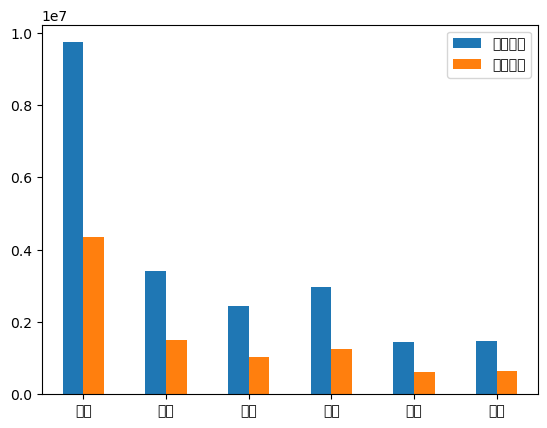

In [107]:
# 인구 통계 시각화
frame = pd.DataFrame(dict_data)
index = ['서울', '부산', '대구', '인천', '광주', '대전']

x1 = frame.iloc[:6, 1]
x1 = x1.values.tolist()

x2 = frame.iloc[:6, 2]
x2 = x2.values.tolist()

df = pd.DataFrame({'총인구수':x1, '총세대수':x2}, index=index)
ax = df.plot.bar(rot=0)

read_csv를 pandas에서 똑같이 사용해보자.
read_table, read_excel, read_html, read_json, read_sql, read_pickle, read_stata, read_sas, read_clipboard, read_feather

In [108]:
df = pd.read_csv('ex1.csv')
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [111]:
pd.read_table('ex1.csv', sep=',') # sep=',' : read table로 읽고 싶을 때 작성

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [117]:
# 모든 파일이 열 이름을 가지고 있는 것은 아니다.
pd.read_csv('ex2.csv', header=None) # 헤더가 없음을 알려준다.

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [120]:
names = ['a', 'b', 'c', 'd', 'message']
pd.read_csv('ex2.csv', names=names) # 컬럼명을 지정하여 작성해줄 수 있다.

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [121]:
names = ['a', 'b', 'c', 'd', 'message']
pd.read_csv('ex2.csv', names=names, index_col = 'message')

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


In [126]:
pd.read_csv('csv_mindex.csv', index_col=['key1', 'key2'])

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

In [128]:
pd.read_table('ex3.txt', sep='\s+') # \s+ : 공백문자 하나 이상의 문자열

,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


In [131]:
pd.read_csv('ex4.csv', skiprows = [0, 2, 3]) # skiprows : 필요없는 행(결측값) 삭제

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [135]:
pd.read_csv('ex5.csv') # Pandas에서 소실값을 빈문자 '', NA, NULL 등으로 표시

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [138]:
na = pd.read_csv('ex5.csv')
na

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [142]:
na.isnull() # 결측값에 True 출력

,something,a,b,c,d,message
0,False,False,False,False,False,True
1,False,False,False,True,False,False
2,False,False,False,False,False,False


In [143]:
pd.read_csv('ex5.csv', na_values=['one'])
# 채워주기 이전, one으로 넣은 데이터 = null로 판단

,something,a,b,c,d,message
0,NaN,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [146]:
# 소실값 지정
소실 = {'message' : ['foo', 'NA'], 'something' : ['two']}
pd.read_csv('ex5.csv', na_values=소실)

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,NaN,5,6,NaN,8,world
2,three,9,10,11.0,12,NaN


In [147]:
pd.read_csv('ex6.csv')

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q
...,...,...,...,...,...
9995,2.311896,-0.417070,-1.409599,-0.515821,L
9996,-0.479893,-0.650419,0.745152,-0.646038,E
9997,0.523331,0.787112,0.486066,1.093156,K
9998,-0.362559,0.598894,-1.843201,0.887292,G


In [153]:
pd.options.display.max_rows = 10

In [165]:
sample = pd.read_csv('ex6.csv', nrows = 5) # 몇 개를 읽어올지 지정해줄 수 있다.
sample

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q


In [169]:
sample.to_csv('sample.csv')
!type sample.csv

sample.csv not found


In [167]:
import sys

sample.to_csv(sys.stdout, sep='|')

|one|two|three|four|key
0|0.467976300189|-0.0386485396255|-0.295344251987|-1.82472622729|L
1|-0.358893469543|1.40445260007|0.704964644926|-0.200638304015|B
2|-0.50184039929|0.659253707223|-0.421690619312|-0.0576883018364|G
3|0.204886212202|1.07413396504|1.38836131252|-0.982404023494|R
4|0.354627914484|-0.133115852296|0.283762637978|-0.837062961653|Q


In [170]:
sample = pd.read_csv('ex5.csv')
sample

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [171]:
sample.to_csv(sys.stdout)

,something,a,b,c,d,message
0,one,1,2,3.0,4,
1,two,5,6,,8,world
2,three,9,10,11.0,12,foo


In [173]:
sample.to_csv(sys.stdout, na_rep='Null') # 결측치 조정(직접 조정)

,something,a,b,c,d,message
0,one,1,2,3.0,4,Null
1,two,5,6,Null,8,world
2,three,9,10,11.0,12,foo


In [175]:
sample.to_csv(sys.stdout, index=False, header=False) # 열 이름과 행 이름을 제거하고 진행하는 방법도 존재한다.

one,1,2,3.0,4,
two,5,6,,8,world
three,9,10,11.0,12,foo


In [176]:
sample.to_csv(sys.stdout, index=False, columns=['c', 'b', 'a'])

c,b,a
3.0,2,1
,6,5
11.0,10,9


In [180]:
import numpy as np

days = pd.date_range('2024-05-13', periods=7)

time = pd.Series(np.arange(7), index=days)
time.to_csv(sys.stdout)

,0
2024-05-13,0
2024-05-14,1
2024-05-15,2
2024-05-16,3
2024-05-17,4
2024-05-18,5
2024-05-19,6
